# Testing Text Generation

In [0]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam

import numpy as np

In [144]:
tokenizer = Tokenizer()

data = 'Twinkle Twinkle Little Star'

corpus = data.lower().split('\n')
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'twinkle': 1, 'little': 2, 'star': 3}
4


## Create Training Data

In [92]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  # print(token_list)
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:][:i+1]
    # print(n_gram_sequence)
    input_sequences.append(n_gram_sequence)
    # print(input_sequences)

#pad sequences 
max_sequences_len = max([len(x) for x in input_sequences])
# print(max_sequences_len)
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequences_len, padding='pre'))
# input_sequences
# # create predictiors and label
xs, labels = input_sequences[:, :-1], input_sequences[:,-1]
xs = np.array(xs)
# print(xs)
# print(labels)
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)
ys = np.array(ys)
# ys

[[0 0 1]
 [0 1 1]
 [1 1 2]]
[1 2 3]


array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [93]:
xs

array([[0, 0, 1],
       [0, 1, 1],
       [1, 1, 2]], dtype=int32)

In [94]:
ys

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [95]:
print(tokenizer.word_index['twinkle'])
print(tokenizer.word_index['little'])
print(tokenizer.word_index['star'])

1
2
3


In [96]:
print(xs[1])

[0 1 1]


In [98]:
print(ys[1])

[0. 0. 1. 0.]


## Train the model

In [131]:
model = tf.keras.models.Sequential()
# -1 to get the label
model.add(Embedding(total_words, 32, input_length=max_sequences_len-1))
#width of predicting window
model.add(LSTM(20))
# model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=100, verbose=1)

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 1.3866 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 1.3831 - accuracy: 0.6667
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 1.3796 - accuracy: 0.6667
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 1.3761 - accuracy: 0.6667
Epoch 5/100
1/1 [==============================] - 0s 993us/step - loss: 1.3726 - accuracy: 0.6667
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 1.3692 - accuracy: 0.6667
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 1.3657 - accuracy: 0.6667
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 1.3622 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 1.3587 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 1ms/step - loss: 1.3551 - accuracy: 1.0000
Epoch 11/100
1/1 [=====

In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

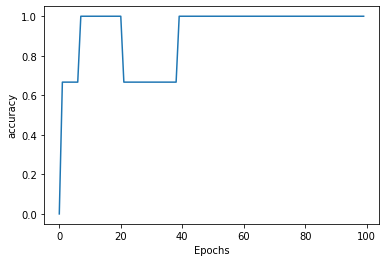

In [133]:
plot_graphs(history, 'accuracy')

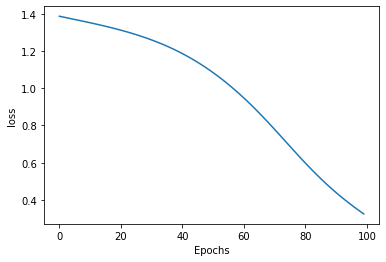

In [134]:
plot_graphs(history, 'loss')

In [150]:
seed_text = 'Twinkle Twinkle'
next_word = 2

for _ in range(next_word):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  # print(token_list)
  token_list = pad_sequences([token_list], maxlen=max_sequences_len-1, padding='pre')
  # print(token_list)
  predicted = model.predict_classes(token_list, verbose=0)
  # print(predicted)
  output_word = ""
  for w, i in tokenizer.word_index.items():
    if i == predicted:
      output_word = w
      # print(output_word)
      break
  seed_text += " " + output_word
print(seed_text)


Twinkle Twinkle little star


## Comment

But do you know that the more words you predict, the more likely you are going to get gibberish? Because each word is predicted, so it's not 100 per cent certain, and then the next one is less certain, and the next one, etc